In [2]:
import matplotlib.pyplot as plt
import pickle
import os
import pandas as pd
import numpy as np
import cv2
%matplotlib inline

In [56]:
# utility functions
def load_train_images(images_dir, crop=False):
    dirs = sorted(os.listdir(images_dir))
    images = []
    labels = []

    for d in dirs:
        prefix = images_dir + d
        r = pd.read_csv('{}/GT-{}.csv'.format(prefix, d), delimiter=';')
        for i, f in enumerate(r['Filename']):
            image_path = '{}/{}'.format(prefix, f)
            x1 = r['Roi.X1'][i]
            y1 = r['Roi.Y1'][i]
            x2 = r['Roi.X2'][i]+1
            y2 = r['Roi.Y2'][i]+1
            label = r['ClassId'][i]
            image = plt.imread(image_path)
            if crop:
                image = image[y1:y2, x1:x2, :]
            images.append(image)
            labels.append(label)

    return np.array(images), np.array(labels)

def load_test_images(images_dir, crop=False):
    files = sorted(os.listdir(images_dir))
    images = []
    labels = []
    
    r = pd.read_csv('{}/GT-final_test.csv'.format(images_dir), delimiter=';')
    for i, f in enumerate(r['Filename']):
        image_path = '{}/{}'.format(images_dir, f)
        x1 = r['Roi.X1'][i]
        y1 = r['Roi.Y1'][i]
        x2 = r['Roi.X2'][i]+1
        y2 = r['Roi.Y2'][i]+1
        label = r['ClassId'][i]
        image = plt.imread(image_path)
        if crop:
            image = image[y1:y2, x1:x2, :]
        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)



def resize_images(images, size=(32,32)):
    resized_images = []
    for image in images:
        resized_images.append(cv2.resize(image, size))
    return np.array(resized_images)

In [3]:
train_dir = './GTSRB_Train/Final_Training/Images/'
train_images, train_labels = load_train_images(train_dir, crop=False)
print(len(train_images), len(train_labels))

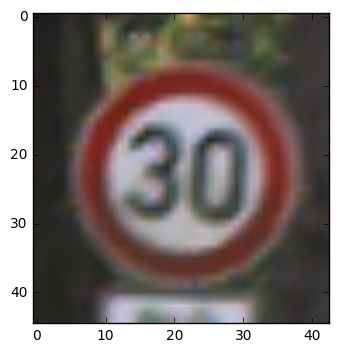

In [48]:
plt.imshow(train_images[800])

In [49]:
# resize images to 32x32
train_resized_images = resize_images(train_images, (32, 32))

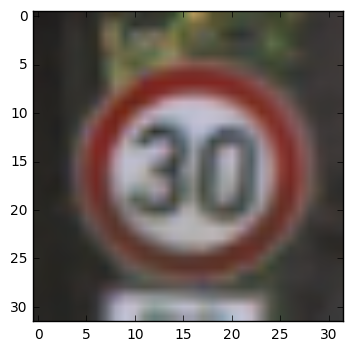

In [50]:
plt.imshow(train_resized_images[800])

In [73]:
# saving as uint8 uses 1 byte per pixel instead of 4 or 8 if we used float32/64
train = {'features': train_resized_images.astype('uint8'), 'labels': train_labels.astype('uint8')}

In [74]:
pickle.dump(train, open('train.p', 'wb'))

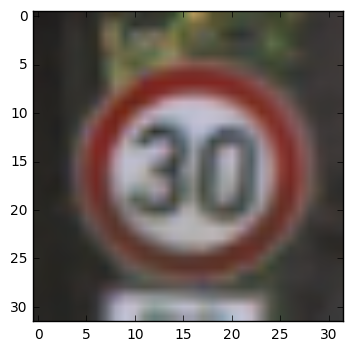

In [75]:
plt.imshow(train['features'][800])

## Test Images

In [53]:
# the test images are saved all in one directory
test_dir = './GTSRB_Test/Final_Test/Images'
files = os.listdir(test_dir)

In [54]:
print(len(files))

12631

In [57]:
test_images, test_labels = load_test_images(test_dir, crop=False)

In [58]:
print(len(test_images), len(test_labels))

12630 12630


In [59]:
# resize these to 32x32
resized_test_images = resize_images(test_images, (32, 32))

In [70]:
test = {'features': resized_test_images.astype('uint8'), 'labels': test_labels.astype('uint8')}

In [71]:
pickle.dump(test, open('test.p', 'wb'))

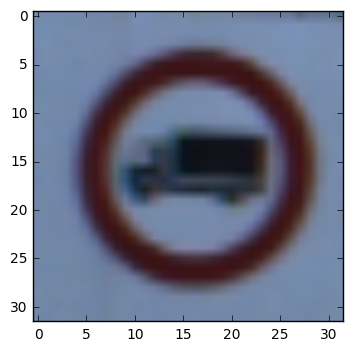

In [72]:
plt.imshow(test['features'][0])

In [63]:
test_labels[0]

16

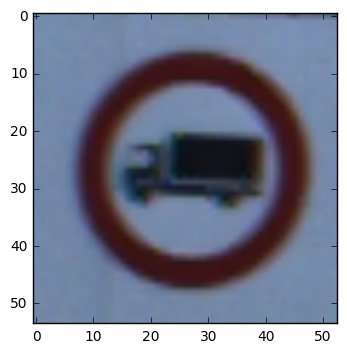

In [65]:
plt.imshow(test_images[0])

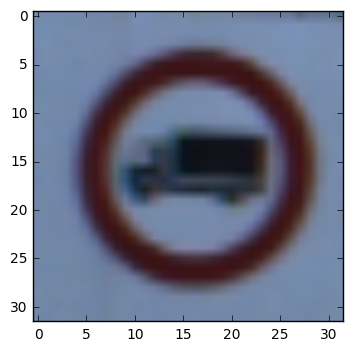

In [69]:
plt.imshow(resized_test_images[0])